<h1>Clusterig Analysis - Case Studies</h1>

<h2>Wine Dataset Clustering</h2>

In [1]:
import pandas as pd


wine_df = pd.read_csv('../datasets/wine-clustering.csv')
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h2>Case Study 1: 2D clustering </h2>
<ul>
    <li>Provide a Scatter plot of Wine data based on their color_intesity and Alcohol levels</li>
    <li>Using K-Means clustering, and using k-optimality indexes, group the data in their most optimal clusters</li>
</ul>

<h2>Case Study 2: nD clustering</h2>
<ul>
    <li>Make use of PCA to transform the datasets and evaluate the contribution of the first two principal components to
    variance explanation</li>
    <li>Use the first two principal components to visualise the entire datasets in 2D</li>
    <li>Using K-Means clustering, and using k-optimality indexes, group the data in their most optimal clusters</li>
    <li>Visualise your cluster group using their PCA representation in 2D</li>
</ul>

<h2>Case Study 3: Cluster Group Interpretation</h2>
<ul>
    <li>From the cluster groups obtained from Case Study 2 - Generate a labelled datasets with cluster labels as target values</li>
    <li>Choose a subset of explanatory features from the data: Use all initially</li>
    <li>Split your dataset into Training and Test set</li>
    <li>Build a decision tree in its optimal configuration (Hyperparameter tuning)</li>
    <li>Assess the model performance in terms of F1 score and classification accuracy</li>
    <li>Visualise your decision tree rules to get insights on each cluster subset</li>
</ul>

<h2>Annexe: Silhouette Score</h2>

The silhouette score estimates how poor or well is a data point dissimilarity within the assigned cluster than outside the cluster by computing two dissimilarity measures:

\begin{equation}
    a(x_i) = \frac{1}{N_p-1}\sum_{j,x_i\neq x_j\in C_p}^{N_p-1}d(x_i,x_j)
\end{equation}
where $a(x_i)$ is the average distance between a data point $x_i$ and all other points within its cluster $C_p$.<br/><br/>
\begin{equation}
    b(x_i) = min\{\mu(x_i,C_j)\},j\neq p
\end{equation}
<br/>where $b(x_i)$ is the smallest average distance between a data point $x_i$ and any other point of all other clusters besides its cluster $C_p$.

The Silhouette score is thus denoted as

\begin{equation}
    s(x_i) = \frac{b(x_i)-a(x_i)}{max\{a(x_i),b(x_i)\}}, s(x_i) \in [-1,1]
\end{equation}<br/>
whereby the largest positive value indicates that the data point is well clustered and the largest negative value that it is poorly clustered. The average silhouette value  (i.e. $s_k=\frac{1}{N}\sum_{i}^{N}s(x_i)$) for all data points is used to rank a given k-Clustering.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore') #ignore warnings
#load the dataset
df = pd.read_csv('../datasets/OLART_customers.csv')

#select data of interest
sub_df = df.iloc[:,[3,4]] #Annual Income against Spending Score
x_1 = sub_df['Annual Income (k$)']
x_2 = sub_df['Spending Score (1-100)']

sv=[]
for k in range(2,20): #set range k values to search from
    km = KMeans(k)
    km.fit(sub_df)
    score = silhouette_score(sub_df,km.labels_,metric='euclidean')
    sv.append(score)


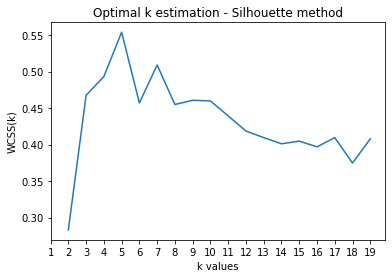

In [9]:
import numpy as np
plt.figure()
plt.plot(np.arange(2,20),sv)
plt.xticks(range(1,20))
plt.xlabel('k values')
plt.ylabel('WCSS(k)')
plt.title('Optimal k estimation - Silhouette method')
plt.show()